In [1]:
import os
import sys
from dotenv import load_dotenv
from langchain_openai import ChatOpenAI
from langchain_ollama import ChatOllama
import asyncio
from pathlib import Path
module_path = os.path.abspath(os.path.join(os.sep.join(['..'])))
if module_path not in sys.path:
    sys.path.append(module_path)
from fedot_llm.data.loaders import PathDatasetLoader
from fedot_llm.main import FedotAI

In [2]:
def _set_env(var: str):
    if not os.environ.get(var):
        print(f"No {var} in env")

load_dotenv()
_set_env("LANGSMITH_API_KEY")
_set_env("OPENAI_TOKEN")

In [3]:
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_PROJECT"] = "AutoML-LLM"

In [8]:
# llm = ChatOpenAI(model='gpt-4o-mini', base_url='https://models.inference.ai.azure.com', api_key=os.environ['OPENAI_TOKEN'])
llm = ChatOllama(model='llama3.1')

msg="""Create a model that perform this task:
Our client is an insurance company that has provided health insurance to its customers.
They are interested in whether the policyholders (customers) from last year
will also be interested in the car insurance provided by the company."""

dataset_path = Path('datasets') / 'Health_Insurance'
dataset = PathDatasetLoader.load(dataset_path)

In [9]:
fedot_ai = FedotAI(dataset=dataset, model=llm)

2024-09-11 21:37:13,766 - Collection: 'FedotDocs' already exists in Chroma. Skipping document load.


2024-09-11 21:37:13,810 - Backing off send_request(...) for 0.3s (requests.exceptions.ConnectionError: HTTPSConnectionPool(host='us.i.posthog.com', port=443): Max retries exceeded with url: /batch/ (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x1085b37c0>: Failed to resolve 'us.i.posthog.com' ([Errno 8] nodename nor servname provided, or not known)")))
2024-09-11 21:37:14,067 - Backing off send_request(...) for 0.8s (requests.exceptions.ConnectionError: HTTPSConnectionPool(host='us.i.posthog.com', port=443): Max retries exceeded with url: /batch/ (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x171a56080>: Failed to resolve 'us.i.posthog.com' ([Errno 8] nodename nor servname provided, or not known)")))
2024-09-11 21:37:14,919 - Backing off send_request(...) for 0.5s (requests.exceptions.ConnectionError: HTTPSConnectionPool(host='us.i.posthog.com', port=443): Max retries exceeded with url: /batch/ (Caused by NameResolutionE

In [10]:
from langchain_core.runnables.schema import StreamEvent
def handler(event: StreamEvent):
    event_type = event['event']
    data = event.get('data', {})
    if event_type == 'on_chat_model_stream':
        if data:
            chunk = data.get('chunk', None)
            if chunk is not None:
                if hasattr(chunk, 'content'):
                    print(chunk.content, end='', flush=True)
                else:
                    print(chunk, end='', flush=True)

In [11]:
fedot_ai.reg_handler(handler)
asyncio.run(fedot_ai.ask(msg))

2024-09-11 21:37:20,788 - Collection: 'FedotDocs' already exists in Chroma. Skipping document load.
2024-09-11 21:37:21,027 - Backing off send_request(...) for 0.2s (requests.exceptions.ConnectionError: HTTPSConnectionPool(host='us.i.posthog.com', port=443): Max retries exceeded with url: /batch/ (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x34411ca90>: Failed to resolve 'us.i.posthog.com' ([Errno 8] nodename nor servname provided, or not known)")))
2024-09-11 21:37:21,190 - Backing off send_request(...) for 1.2s (requests.exceptions.ConnectionError: HTTPSConnectionPool(host='us.i.posthog.com', port=443): Max retries exceeded with url: /batch/ (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x34411ed70>: Failed to resolve 'us.i.posthog.com' ([Errno 8] nodename nor servname provided, or not known)")))
2024-09-11 21:37:21,966 - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2024-09-11 21:37:22,138 - HTT

In [6]:
fedot_ai = FedotAI(dataset=dataset, model=llm)
fedot_ai.reg_handler(handler)
await fedot_ai.ask(msg)

2024-09-11 20:59:05,999 - Collection: 'FedotDocs' already exists in Chroma. Skipping document load.
{'event': 'on_chain_start', 'data': {'input': {'messages': [('user', 'Create a model that perform this task:\nOur client is an insurance company that has provided health insurance to its customers.\nThey are interested in whether the policyholders (customers) from last year\nwill also be interested in the car insurance provided by the company.')]}}, 'name': 'LangGraph', 'tags': [], 'run_id': '4c989c60-84b9-40d1-81fb-c39185c6dfc5', 'metadata': {'name': 'SupervisorAgent'}, 'parent_ids': []}
{'event': 'on_chain_start', 'data': {'input': {'messages': [('user', 'Create a model that perform this task:\nOur client is an insurance company that has provided health insurance to its customers.\nThey are interested in whether the policyholders (customers) from last year\nwill also be interested in the car insurance provided by the company.')]}}, 'name': '__start__', 'tags': ['graph:step:0', 'langsmi

In [13]:
inputs = {"messages": [("user", "Fedot automl with_tunning configuration?")]}
print_stream(app.stream(inputs, stream_mode="values"))

================================ Human Message =================================

Fedot automl with_tunning configuration?
================================== Ai Message ==================================
Tool Calls:
  research (call_5swaBkiaenL6zQvzPLFzuoLW)
 Call ID: call_5swaBkiaenL6zQvzPLFzuoLW
  Args:
    question: Fedot AutoML with tuning configuration
2024-09-11 16:28:24,810 - Giving up send_request(...) after 4 tries (requests.exceptions.ConnectionError: HTTPSConnectionPool(host='us.i.posthog.com', port=443): Max retries exceeded with url: /batch/ (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36e033c70>: Failed to resolve 'us.i.posthog.com' ([Errno 8] nodename nor servname provided, or not known)")))
================================= Tool Message =================================
Name: research

FEDOT allows for both full and partial automation of the learning process. By default, you can create a FEDOT instance and call the `fit` method with yo

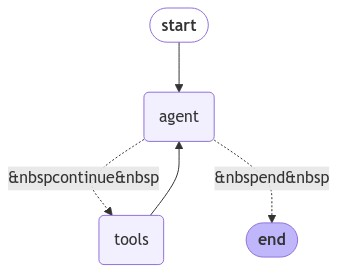

In [11]:
from IPython.display import Image, display

display(Image(app.get_graph().draw_mermaid_png()))